In [12]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pareto
import random
import functions as f

```import functions as f``` : imports the package where we defined all of our functions

In [13]:
#GLOBAL CONSTANTS
clv_theory = 10 
size= 10000 # size of each sample
n = 10000 # number of samples
DureeObs = 12*2 # duration of observation

## Exponential (not censored)

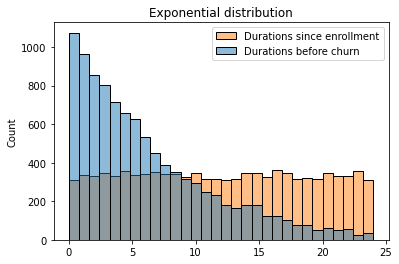

In [33]:
sns.histplot( f.generate_exponential(clv_theory, size,DureeObs)).set(title="Exponential distribution")
plt.legend(['Durations since enrollment','Durations before churn'])
plt.show()

**CLV computing**

In [14]:
# CONSTANT
censored = 0
# Monte Carlo simulation
clv_exp_nc, Y_n = f.monte_carlo(clv_theory, size, n, censored, f.exp_nc_clv_estimator, f.generate_nc_exponential)

CONVERGENCE :
 	 size of each dataset =10000 
 	 number of datasets =10000 
 	 CLV thoery = 10.00 
 	 CLV real = 9.999725  
 	 Standard deviation CLV= 0.099557


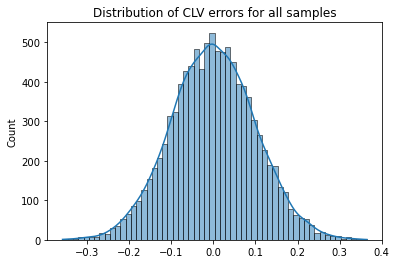

In [15]:
f.print_conv_plot_distribution(size, n ,clv_theory, clv_exp_nc)

Thanks to this plot, we can see in practice the convergence of the estimator.

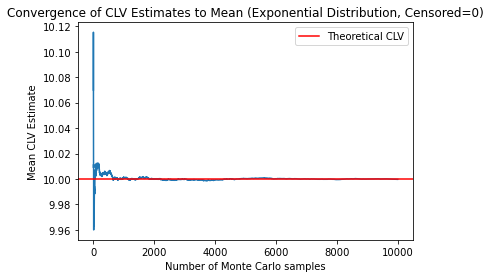

In [32]:
f.clv_convergence(clv_exp_nc, clv_theory,n , 'Convergence of CLV Estimates to Mean (Exponential Distribution, Censored=0)')

**Confidence interval - Monte Carlo**

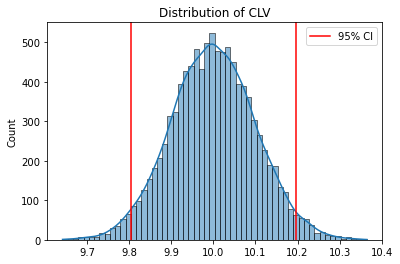

IC = [9.80 , 10.20 ] 


In [17]:
lower_exp_nc, upper_exp_nc = f.CI_plot_95(clv_exp_nc, 0.05)

95% of the CLV values of the all the Monte Carlo samples are within this confidence interval.

**Confidence interval - Bootstrapping**

In reality, it is not feasible to have thousands of datasets to compute confidence intervals. Therefore, we typically use a single dataset to construct several samples of the same size by performing "sampling with replacement".

In [18]:
# GENERATE one sample to study the effect of boostrapping
Y_n = f.generate_nc_exponential(clv_theory, size)

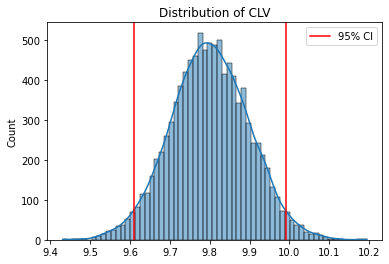

IC = [9.61 , 9.99 ] 


In [19]:
_, clv_exp_ncb = f.bootstrap_samples(Y_n, censored, f.exp_nc_clv_estimator)
lower_exp_ncb, upper_exp_ncb  = f.CI_plot_95(clv_exp_ncb, 0.05)

In [20]:
print(f"Confidence level : {f.confidence_lvl(lower_exp_ncb, upper_exp_ncb, clv_exp_nc):.2f}%")

Confidence level : 47.15%


## Exponential (censored)

**CLV computing**

In [21]:
# CONSTANT
censored = 1
# Monte Carlo simulation
clv_exp_c, Y_n =f. monte_carlo(clv_theory, size, n, censored, f.exp_c_clv_estimator, f.generate_exponential)

CONVERGENCE :
 	 size of each dataset =10000 
 	 number of datasets =10000 
 	 CLV thoery = 10.00 
 	 CLV real = 10.001961  
 	 Standard deviation CLV= 0.125921


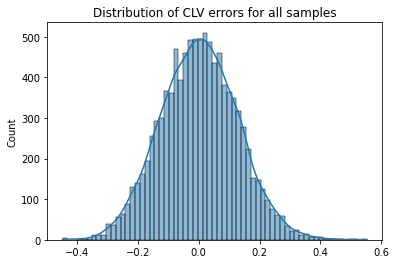

In [22]:
f.print_conv_plot_distribution(size, n ,clv_theory, clv_exp_c)

The error is still normally distributed and the standart deviation is higher. 
As censored data are normally distributed, they have no impact on the error distribution. Censored data increase the std of the error by 40% comparing to non censored data.

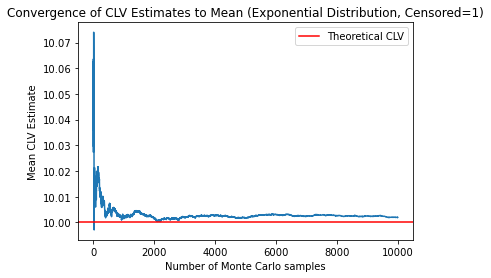

In [23]:
f.clv_convergence(clv_exp_c, clv_theory,n , 'Convergence of CLV Estimates to Mean (Exponential Distribution, Censored=1)')

**Theoretical confidence intervals**

In [24]:
lower_exp_c = []
upper_exp_c = []
for i in range(n):
    lower_exp_c.append(f.CI_exp_c_clv(1.96, Y_n[i][0], Y_n[i][1])[0])
    upper_exp_c.append(f.CI_exp_c_clv(1.96, Y_n[i][0], Y_n[i][1])[1])

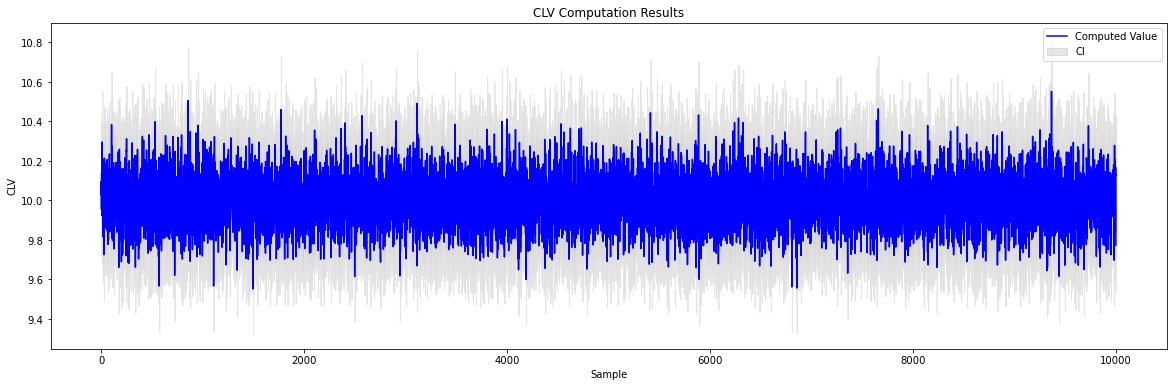

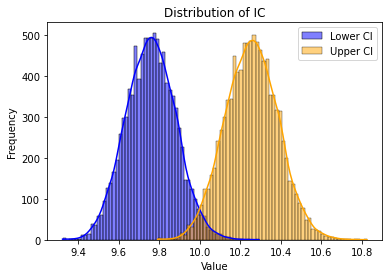

Theoritical_CI = [9.759223982156515, 10.257080411787351 ]. 
 CONFIDENCE LEVEL: 95.33% of new estimators are within this interval


In [25]:
# plot confidence interval
f.CI_multiplot(clv_exp_c, lower_exp_c, upper_exp_c)

**Confidence interval Monte Carlo**

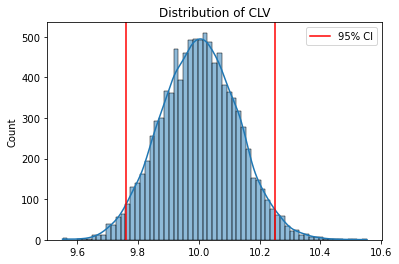

IC = [9.76 , 10.25 ] 


In [27]:
lower_exp_c2, upper_exp_c2 = f.CI_plot_95(clv_exp_c, 0.05)

Using the Monte Carlo method to estimate confidence intervals is an efficient approach, as it often yields similar results to those obtained using theoretical formulas. In fact, the average confidence interval estimated using Monte Carlo simulations is here identical to the one calculated using theoretical formulas.

**Bootstrap confidence intervals**

Although the confidence intervals have been calculated using the theoretical formula, the purpose of this section is to verify the results using the bootstrap method.

In [28]:
# GENERATE one sample to study the effect of boostrapping
Y_n =[]
T, A = f.generate_exponential(clv_theory, size, DureeObs)
Y_n.append(T)
Y_n.append(A)

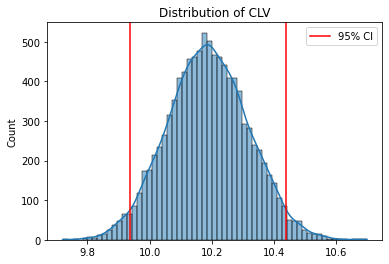

IC = [9.94 , 10.44 ] 


In [29]:
_,_ , clv_exp_cb = f.bootstrap_samples(Y_n, censored, f.exp_c_clv_estimator)
lower_exp_cb, upper_exp_cb  = f.CI_plot_95(clv_exp_cb, 0.05)

The confidence level derived from the bootstrap method is approximately 98% consistent with the one obtained with theoretical approach.

In [30]:
print("Confidence level : %.2f" % (f.confidence_lvl(lower_exp_cb, upper_exp_cb, clv_exp_c)))

Confidence level : 69.17


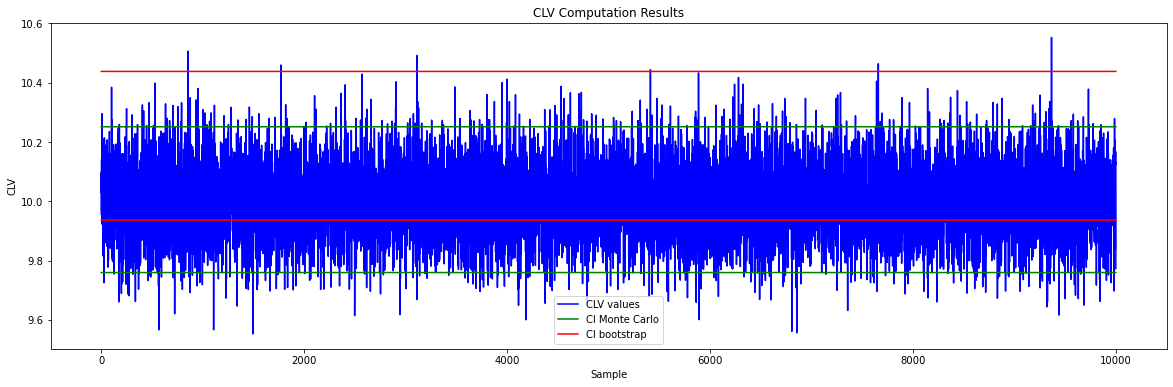

In [31]:
# plot confidence interval
f.CI_monoplot(clv_exp_c, np.full(size, lower_exp_c2),np.full(size, upper_exp_c2), np.full(size, lower_exp_cb),np.full(size, upper_exp_cb) )